# EDA Demanda de Reservas del **Hotel**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/hotel_bookings.csv',  sep=',', encoding='utf-8')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Rveisamos valores duplicados
df[df.duplicated()].shape

(31994, 32)

In [ ]:
#eliminamos los duplicados
df.drop_duplicates(inplace = True)
unicos = df.shape[0]
unicos

87396

In [ ]:
df.shape

(87396, 32)

In [ ]:
pd.set_option('display.max_columns', 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Validamos los valores unicos x variable
print(df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

In [ ]:
#contamos el número de valores únicos
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
#contamos  la frecuencia de cada valor único en la columna hotel
df['hotel'].value_counts()

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64

In [ ]:
# Contamos la frecuencia de cada valor único en la columna 'meal'
"""
BB: Bed and Breakfast (Alojamiento y Desayuno)
HB: Half Board (Media Pensión, incluye desayuno y una comida más)
SC: Self Catering (Alojamiento sin comidas incluidas)
Undefined: No definido
FB: Full Board (Pensión Completa, incluye todas las comidas)"""
df['meal'].value_counts()

meal
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: count, dtype: int64

In [ ]:
#Contabilizamos las reservas realizadas polos canales de distribución
df['distribution_channel'].value_counts()


distribution_channel
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: count, dtype: int64

*   TA/TO (Travel Agency/Tour Operator)
*   Elemento de lista:Este esel canal de distribución más utilizado, indicando que la mayoría de las reservas se hacen a través de estos intermediarios.


*   Direct:
Este es el segundo canal más común
Corporate:runa parte considerable de las reservas provienen de clientes corporativos.
*  GDS (Global Distribution System):

Hay 193 registros que se realizaron a través de sistemas de distribución global.
Este es un canal menos común, utilizado para reservas hechas a través de sistemas de distribución que conectan proveedores de servicios con agencias de viajes y otros distribuidores.
Undefined:
Hay 5 registros que están categorizados como indefinidos.


In [ ]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    86251
Non Refund     1038
Refundable      107
Name: count, dtype: int64

In [ ]:
df['market_segment'].value_counts()

market_segment
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64

In [ ]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    43894
1    29017
2    11812
3     2317
4      320
5       36
Name: count, dtype: int64

In [ ]:
df['customer_type'].value_counts()

customer_type
Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: count, dtype: int64

In [ ]:
#Descripción Estadística de Variables Numéricas
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Analisis grafico de las variables categoricas y numericas

<ipython-input-193-8952c1e2eb40>:6: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



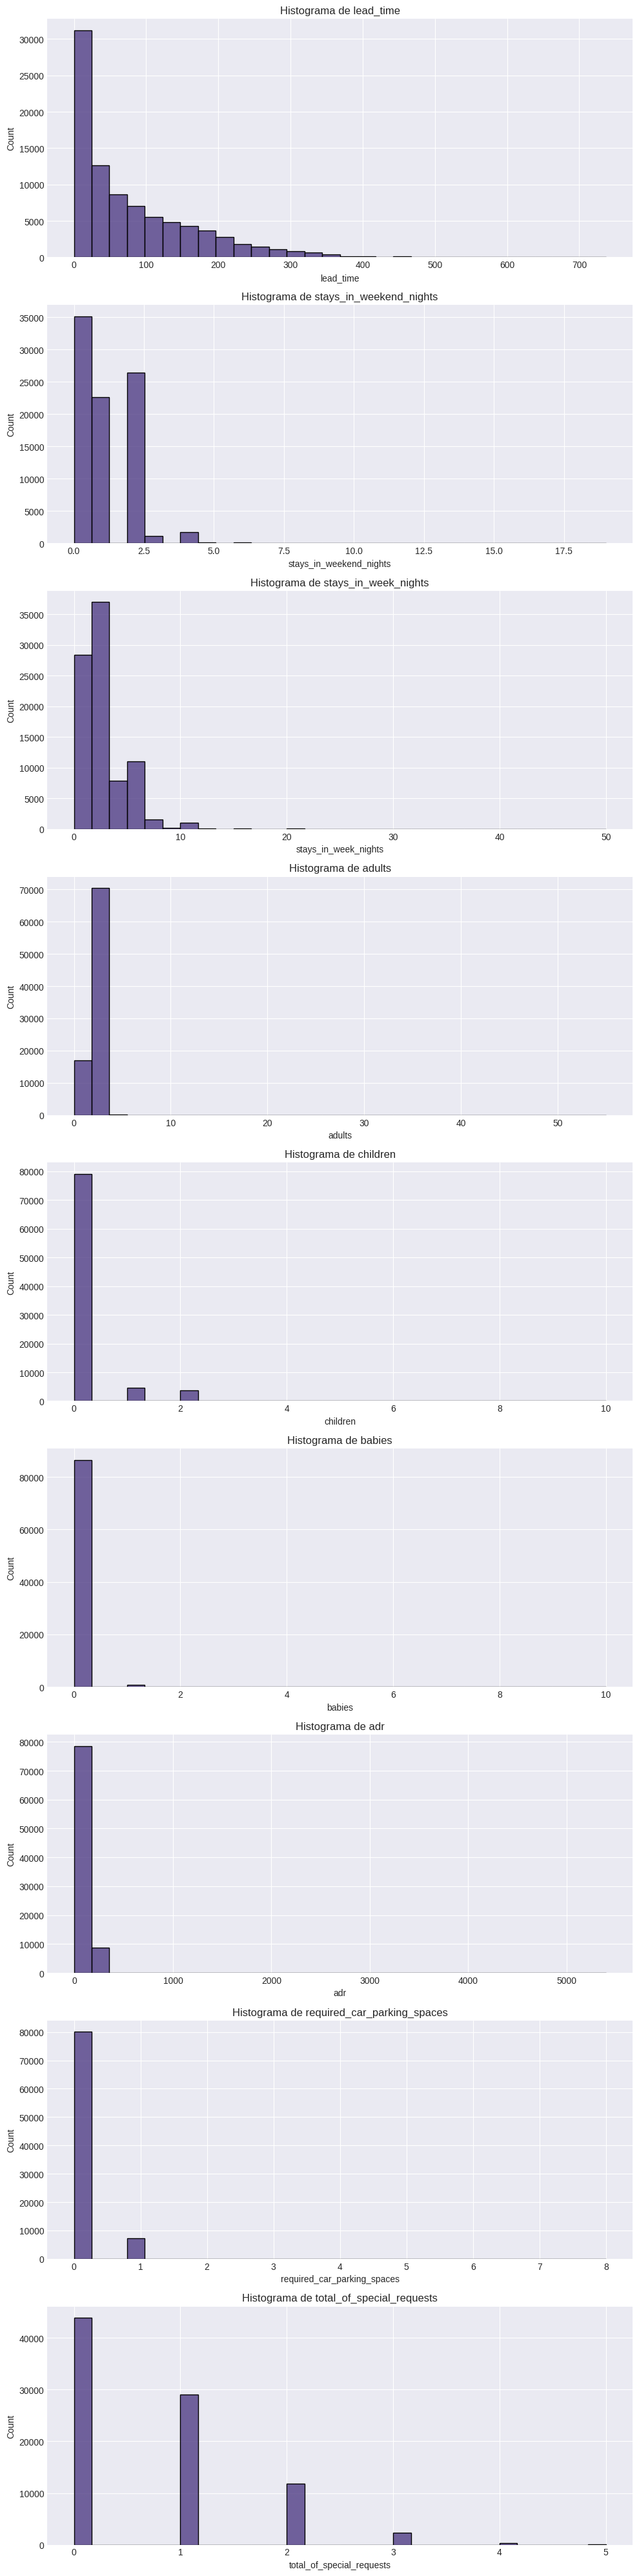

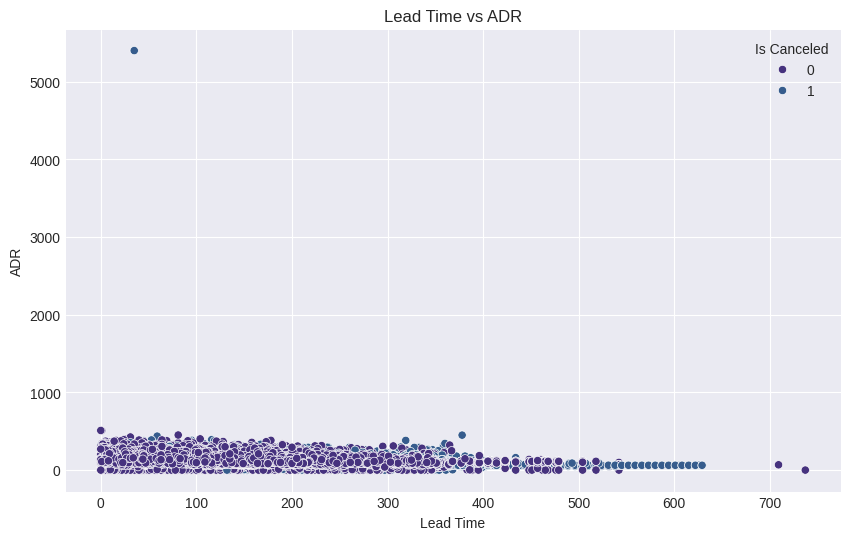

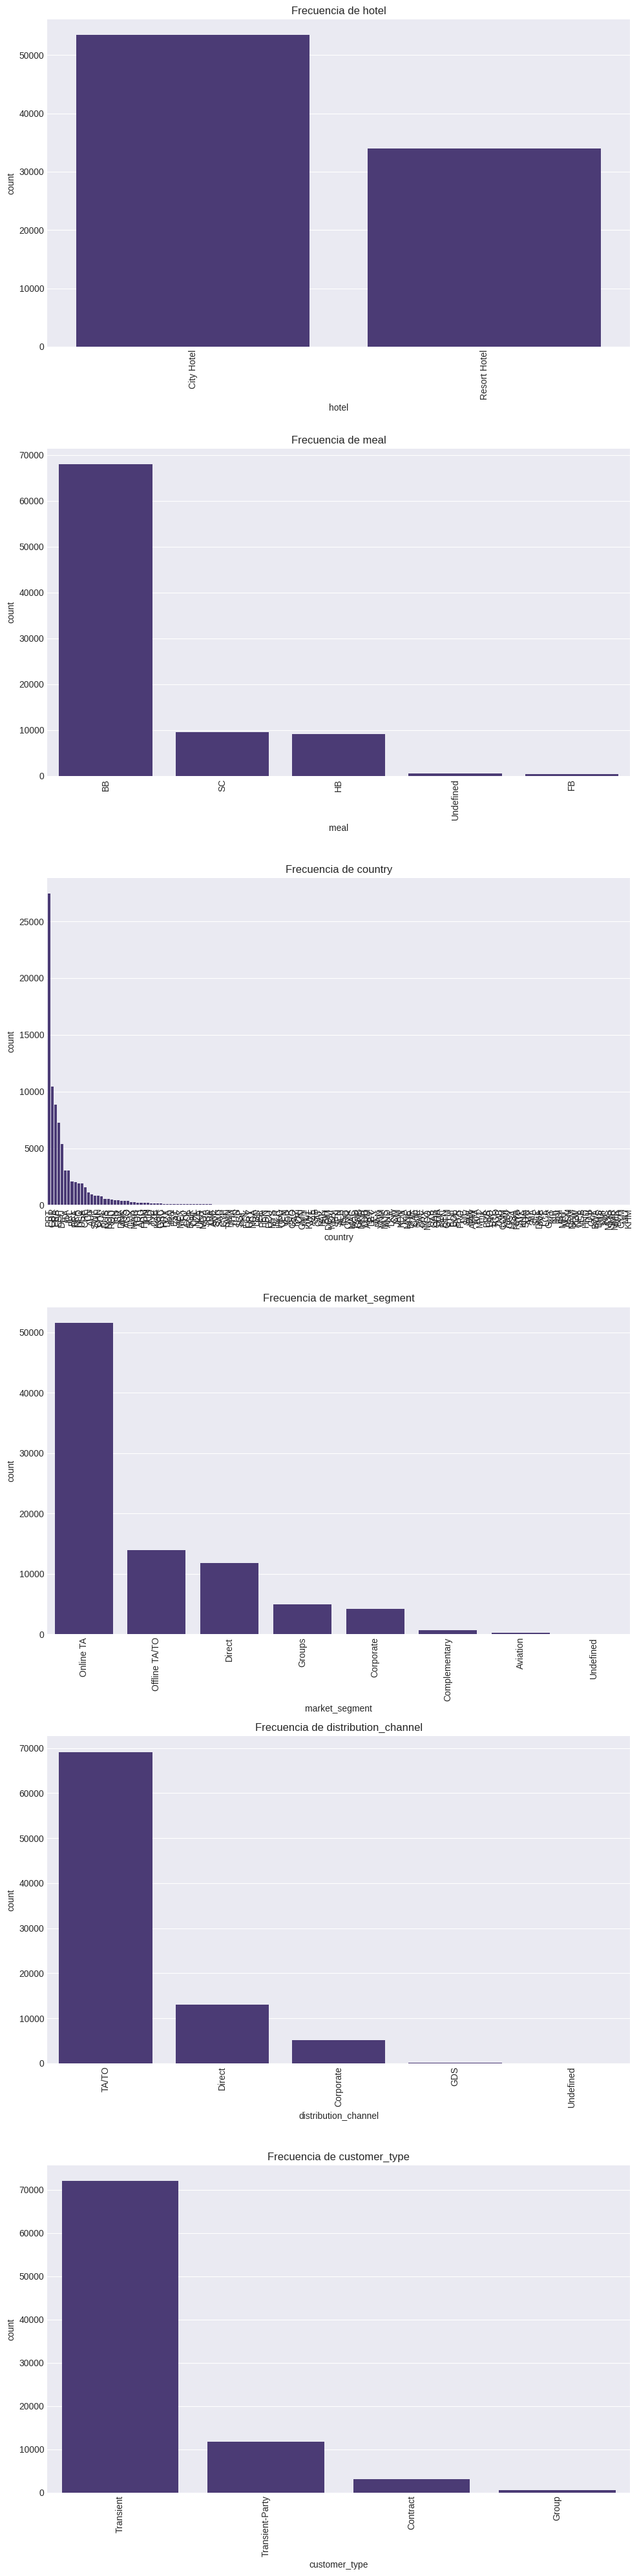

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes para visualización
plt.style.use('seaborn-darkgrid')
sns.set_palette("viridis")

# Resumen estadístico de variables numéricas
numeric_summary = df.describe()

# Resumen estadístico de variables categóricas
categorical_summary = df.describe(include=['object', 'category'])

# Histogramas para variables numéricas
numeric_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'adults', 'children', 'babies', 'adr', 'required_car_parking_spaces',
                   'total_of_special_requests']

# Crear un histograma para cada variable numérica
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 40))
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, ax=axes[i])
    axes[i].set_title(f'Histograma de {column}')
plt.tight_layout()
plt.show()

# Diagramas de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='adr', hue='is_canceled')
plt.title('Lead Time vs ADR')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.legend(title='Is Canceled')
plt.show()

# Diagramas de barras para variables categóricas
categorical_columns = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'customer_type']

# Crear un gráfico de barras para cada variable categórica
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 40))
for i, column in enumerate(categorical_columns):
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frecuencia de {column}')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


# Analisis de la relación de variables con la matriz de Correlación
a) 1 indica una correlación positiva perfecta: cuando una variable aumenta, la otra también lo hace en la misma proporción.

b) 0 indica que no hay correlación: no hay relación lineal entre las variables

c) -1 indica una correlación negativa perfecta: cuando una variable aumenta, la otra disminuye en la misma proporción.

d) Colores más oscuros indican correlaciones más fuertes, ya sean positivas o negativas.

e)Colores más claros indican correlaciones más débiles.

<ipython-input-194-6ccada0f8721>:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



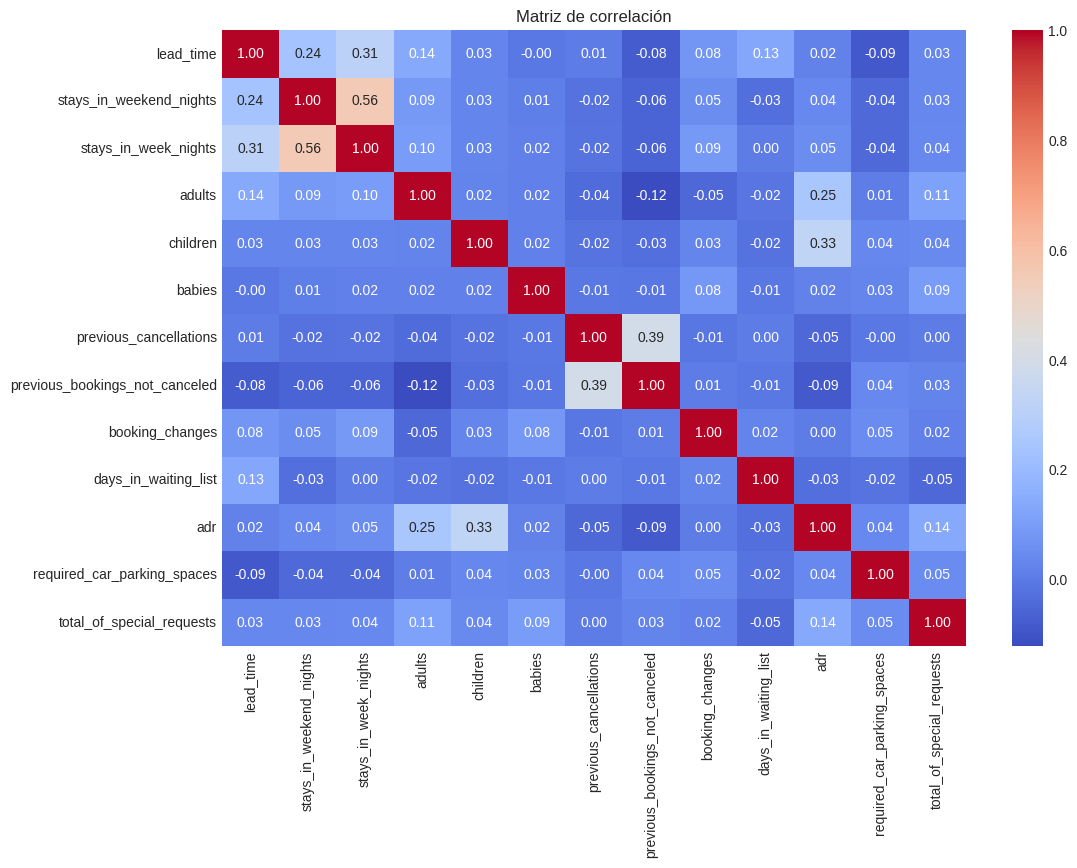

In [ ]:
# Para crear la matriz de correlación excluimos valores unicos y fechas y se contemplan las variables numericas
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set_palette('viridis')

# Seleccionar las columnas numéricas
columns = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
    'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests'
]

df_matrix = df[columns]

# Crear la matriz de correlación
plt.figure(figsize=(12, 8))
matrix = df_matrix.corr()
sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# Limpieza de datos

In [ ]:
#verificar si hay algún valor nulo (NaN) en un DataFrame
df.isnull().values.any()

True

In [ ]:
#Contamos la cantidad de valores nulos (NaN) en cada columna de un DataFrame
# Se observa que las columnas:country, agent, company  tienen valores nulos
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
unique_agents = df['agent'].unique()
print(unique_agents)


[ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.  42.  20.  19.
  45. 

In [ ]:
unique_companies = df['company'].unique()
print(unique_companies)


[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

In [ ]:
unique_country = df['country'].unique()
print(unique_country)

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [ ]:
# Contamos la frecuencia de cada valor único en la columna 'meal'
"""
BB: Bed and Breakfast (Alojamiento y Desayuno)
HB: Half Board (Media Pensión, incluye desayuno y una comida más)
SC: Self Catering (Alojamiento sin comidas incluidas)
Undefined: No definido
FB: Full Board (Pensión Completa, incluye todas las comidas)"""
df['meal'].value_counts()

meal
BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: count, dtype: int64

In [ ]:
# Reemplazar los valores "Undefined" con "SC" en la columna 'meal'
df['meal'] = df['meal'].replace('Undefined', 'SC')

In [ ]:
df['meal'].value_counts()

meal
BB    67978
SC     9973
HB     9085
FB      360
Name: count, dtype: int64

In [ ]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: count, dtype: int64

In [ ]:
# Paso 1: Contar los registros 'Undefined'
undefined_count = df['distribution_channel'].value_counts().get('Undefined', 0)
print(f"Número de registros 'Undefined': {undefined_count}")

# Paso 2: Categorizar 'Undefined' como 'Other'
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'Other')

# Paso 3: Verificar la limpieza
cleaned_counts = df['distribution_channel'].value_counts()
print(cleaned_counts)


Número de registros 'Undefined': 5
distribution_channel
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Other            5
Name: count, dtype: int64


In [ ]:
df['market_segment'].value_counts()

market_segment
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64

In [ ]:
# Paso 1: Contar los registros 'Undefined'
undefined_count = df['market_segment'].value_counts().get('Undefined', 0)
print(f"Número de registros 'Undefined': {undefined_count}")

# Paso 2: Categorizar 'Undefined' como 'Other'
df['market_segment'] = df['market_segment'].replace('Undefined', 'Other')

# Paso 3: Verificar la limpieza
cleaned_counts = df['market_segment'].value_counts()
print(cleaned_counts)


Número de registros 'Undefined': 2
market_segment
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Other                2
Name: count, dtype: int64


In [ ]:
#reemplazamos los valores nulos (NaN) por el valor 0. Al usar el parámetro inplace=True
df.fillna(0, inplace = True)

In [ ]:
#validamos que ya no existan valores nulos
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
#hay una cantidad de reservas que no tienen personas
filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,06/10/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,12/10/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,23/11/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,04/01/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,05/01/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,30/06/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,01/07/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,17/07/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,22/07/2017


In [ ]:
#Devuelve lo que no cumplan la condicion del filtro
data = df[~filter]

In [ ]:
data.shape

(87230, 32)

In [ ]:
#Muestra los valores unicos del campo hotel
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
#Muestra los valores unicos del campo cancelado
data['is_canceled'].unique()

array([0, 1])

In [ ]:
# separa por hotel los datos y que las reservas no estan canceladas
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
City = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [ ]:
resort.shape

(4410, 32)

In [ ]:
City.shape

(0, 32)

In [ ]:
resort['country'].value_counts()

country
PRT    1432
GBR     947
ESP     511
0       371
DEU     265
       ... 
AGO       1
BLR       1
UKR       1
SMR       1
ALB       1
Name: count, Length: 62, dtype: int64

In [ ]:
resort['country'].value_counts().index

Index(['PRT', 'GBR', 'ESP',     0, 'DEU', 'IRL', 'FRA', 'POL', 'NLD', 'BEL',
        'CN', 'CHE', 'USA', 'ITA', 'RUS', 'BRA', 'ROU', 'AUT', 'FIN', 'LUX',
       'SWE', 'NOR', 'LTU', 'DNK', 'AUS', 'LVA', 'ARG', 'EST', 'CHN', 'ISR',
       'CZE', 'KOR', 'IND', 'DZA', 'ZAF', 'TUR', 'CRI', 'CHL', 'CYP', 'MAR',
       'MEX', 'SVN', 'OMN', 'MOZ', 'PRI', 'ZWE', 'CAF', 'IRN', 'HRV', 'JAM',
       'HUN', 'GRC', 'ZMB', 'CPV', 'SRB', 'CYM', 'BWA', 'AGO', 'BLR', 'UKR',
       'SMR', 'ALB'],
      dtype='object', name='country')

In [ ]:
country_wise = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise


,country,count
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [ ]:
country_wise.columns = ['country', 'No of guests']
country_wise

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


**Interpretacion relaciones positivas y moderadas**
- 0.49 de 'stays_in_weekend_nights' vs 'stays_in_week_nights': Los huéspedes que se quedan más noches durante el fin de semana también tienden a quedarse más noches durante la semana
-0.33 de 'adr' vs 'children': Cuando hay niños las tarifas son mas altas puede deberse a que reservan habitaciones mas grandes o mas servicios.

# Datos anormales/ atipicos/outliers prueba de tuckey

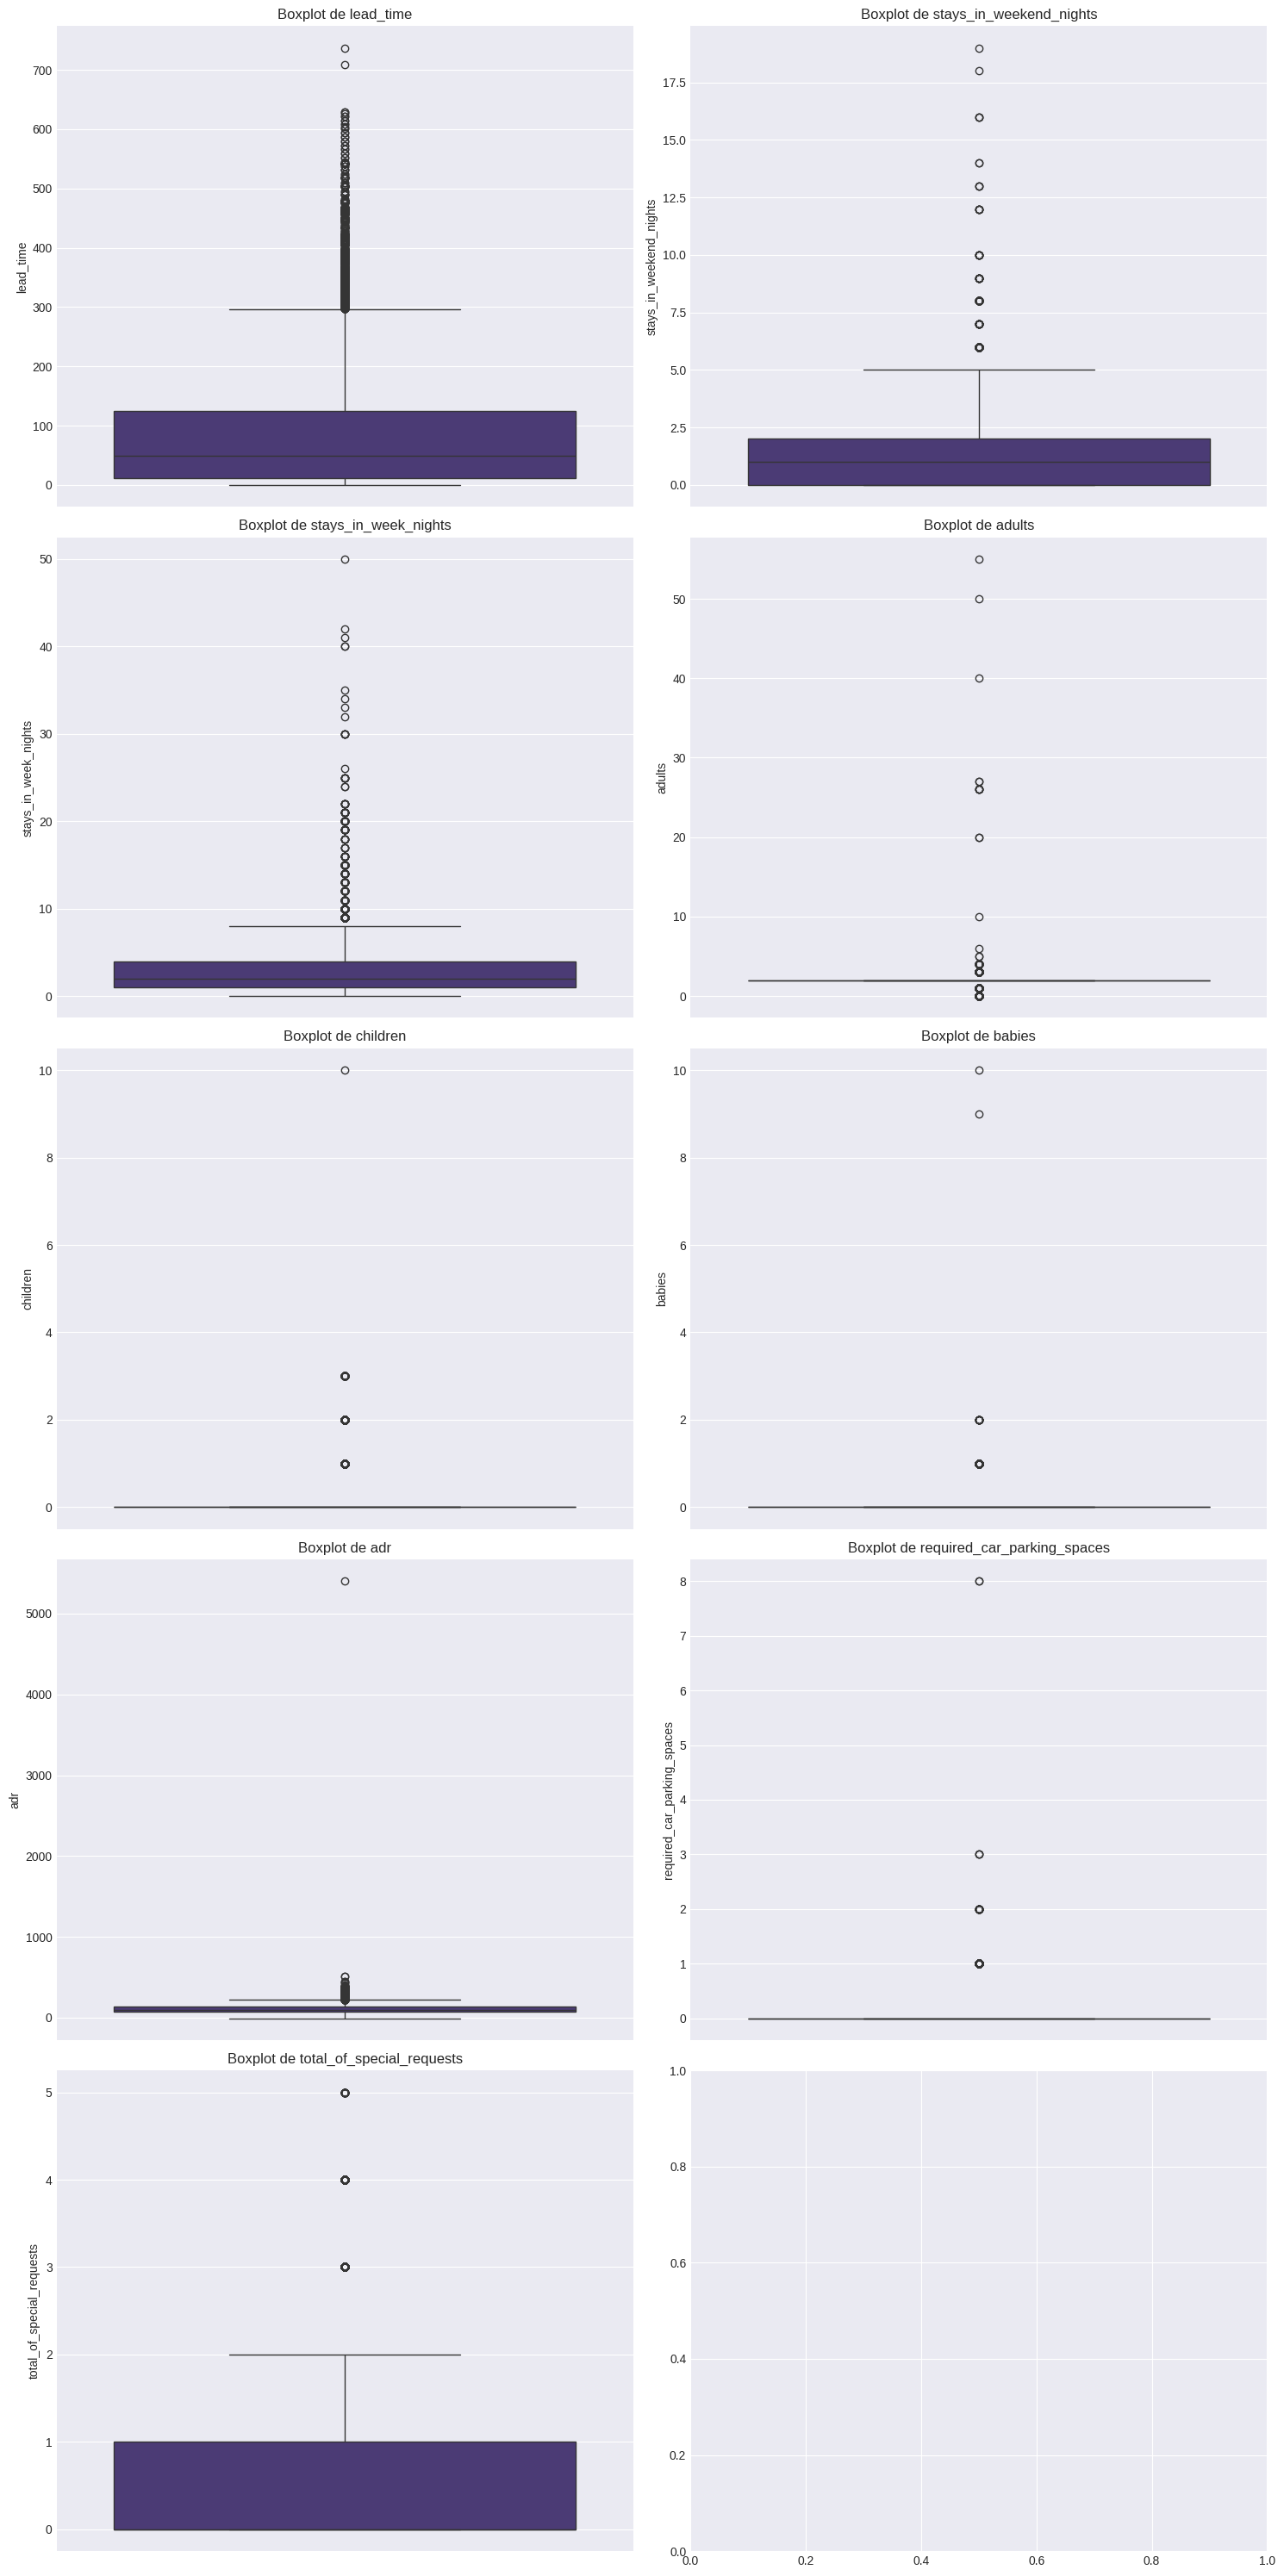

In [ ]:
# 2. Análisis de outliers mediante boxplots
numeric_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'adults', 'children', 'babies', 'adr', 'required_car_parking_spaces',
                   'total_of_special_requests']

fig, axes = plt.subplots((len(numeric_columns) + 1) // 2, 2, figsize=(15, 30))
plt.grid(True)
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()


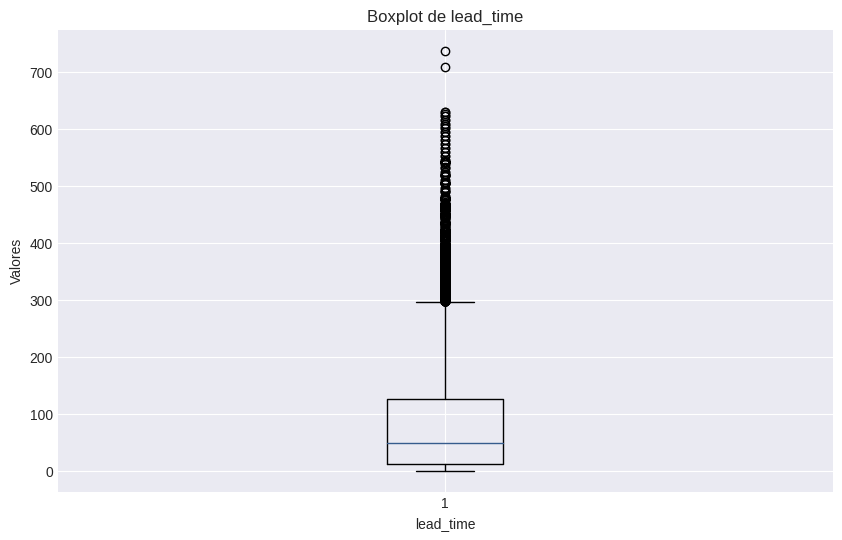

Minimo: 0
Primer Cuartil (Q1): 11.0
Mediana (Q2): 49.0
Tercer Cuartil (Q3): 125.0
Maximo: 737


In [ ]:
# Convertir la columna 'lead_time' a un array de NumPy
lead_time = np.array(data['lead_time'])

# Configurar la cuadrícula y las etiquetas
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.boxplot(lead_time)
plt.title('Boxplot de lead_time')
plt.xlabel('lead_time')
plt.ylabel('Valores')
plt.show()

# Calcular las estadísticas descriptivas
min_value = np.min(lead_time)
max_value = np.max(lead_time)
q1 = np.percentile(lead_time, 25)
median = np.median(lead_time)
q3 = np.percentile(lead_time, 75)

# Imprimir los valores exactos
print(f"Minimo: {min_value}")
print(f"Primer Cuartil (Q1): {q1}")
print(f"Mediana (Q2): {median}")
print(f"Tercer Cuartil (Q3): {q3}")
print(f"Maximo: {max_value}")


**Interpretación del Boxplot de lead_time**

Valores Atípicos: Reservas de 380 a 640 días y 736 días.
Interpretación: Algunos huéspedes planifican con mucha antelación, lo que podría deberse a eventos especiales o planificación extensiva.
Conclusiones
Tendencia Central: La mayoría de las reservas se hacen con entre 18 y 160 días de antelación, con una mediana de 69 días.
Existen algunos outliers significativos que indican reservas con mucha más antelación.

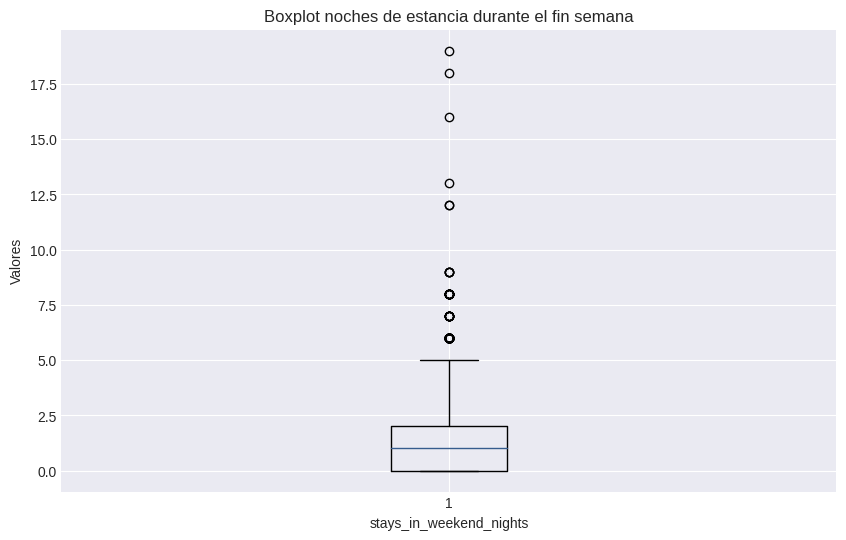

Minimo: 0.0
Primer Cuartil (Q1): 0.0
Mediana (Q2): 1.0
Tercer Cuartil (Q3): 2.0
Maximo: 19.0


In [ ]:
# Convertir la columna 'stays_in_weekend_nights en a un array de NumPy
weekend_nights = np.array(data['stays_in_weekend_nights'])

# Configurar la cuadrícula y las etiquetas
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.boxplot(weekend_nights)
plt.title('Boxplot noches de estancia durante el fin semana')
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('Valores')
plt.show()

# Calcular las estadísticas descriptivas
min_value = np.min(weekend_nights)
max_value = np.max(weekend_nights)
q1 = np.percentile(weekend_nights, 25)
median = np.median(weekend_nights)
q3 = np.percentile(weekend_nights, 75)

# Imprimir los valores exactos
print(f"Minimo: {min_value}")
print(f"Primer Cuartil (Q1): {q1}")
print(f"Mediana (Q2): {median}")
print(f"Tercer Cuartil (Q3): {q3}")
print(f"Maximo: {max_value}")


**Interpretación**
-Mínimo: Hay huespedes que no se quedan en la noche.
- Primer Cuartil (Q1): El 25% de los huéspedes se quedan 0 noches o menos durante el fin de semana.
Mediana (Q2): La mitad de los huéspedes se quedan 1 noche o menos durante el fin de semana.
-Tercer Cuartil (Q3): El 75% de los huéspedes se quedan 2 noches o menos durante el fin de semana.
-Máximo: Hay  algunos casos donde los huésped se han quedado hasta 19 noches durante el fin de semana, lo cual es poco común y se considera atípico.
La mayoría de los huéspedes tienen estadías cortas de fin de semana (0 a 2 noches), pero hay algunos casos excepcionales donde los huéspedes han extendido su estadía significativamente, incluso hasta 19 noches.

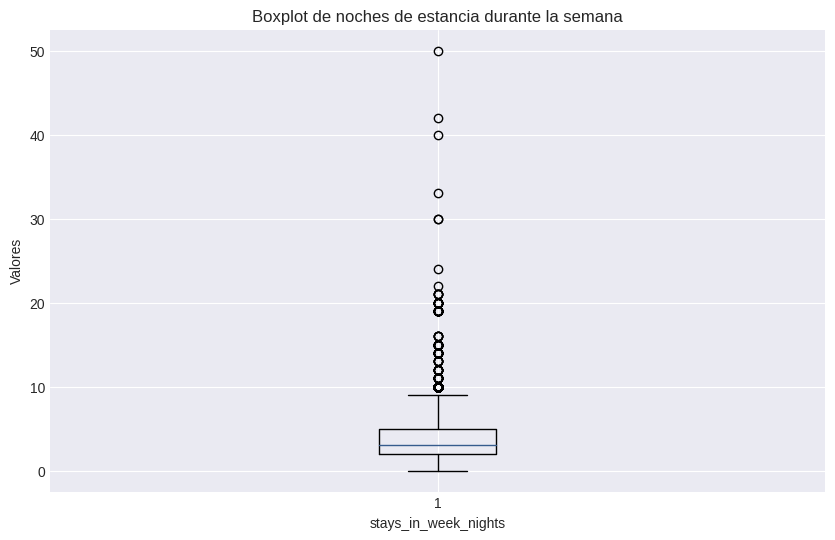

Minimo: 0.0
Primer Cuartil (Q1): 2.0
Mediana (Q2): 3.0
Tercer Cuartil (Q3): 5.0
Maximo: 50.0


In [ ]:
week_nights = np.array(data['stays_in_week_nights'])

# Configurar la cuadrícula y las etiquetas
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.boxplot(week_nights)
plt.title('Boxplot de noches de estancia durante la semana')
plt.xlabel('stays_in_week_nights')
plt.ylabel('Valores')
plt.show()

# Calcular las estadísticas descriptivas
min_value = np.min(week_nights)
max_value = np.max(week_nights)
q1 = np.percentile(week_nights, 25)
median = np.median(week_nights)
q3 = np.percentile(week_nights, 75)

# Imprimir los valores exactos
print(f"Minimo: {min_value}")
print(f"Primer Cuartil (Q1): {q1}")
print(f"Mediana (Q2): {median}")
print(f"Tercer Cuartil (Q3): {q3}")
print(f"Maximo: {max_value}")

#interpretacion


*   Mínimo: 0 noches indica reservas que no incluyen estancia durante la semana
laboral.
*   Primer Cuartil (Q1): 1 noche sugiere que el 25% de las reservas son de una sola noche entre semana.

*  Mediana (Q2): 2 noches indica que la mitad de las reservas tienen una duración de dos noches durante la semana laboral.

*  Tercer Cuartil (Q3): 3 noches significa que el 75% de las reservas son de tres noches o menos durante los días laborables.

*  Máximo: 50 noches muestra el valor más alto registrado para estancias exclusivamente durante la semana laboral, probablemente correspondiente a reservas prolongadas o estadías largas. Se observan valores atipicos que van de 7 a 50 dias.

#Comprobación de Supuestos Estadísticos


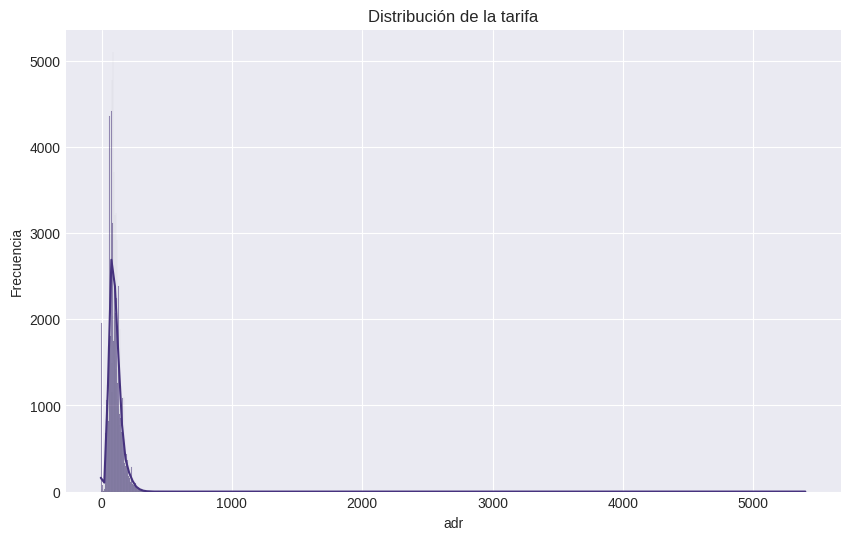

Shapiro-Wilk test para 'adr':
Estadístico W = 0.8672528266906738
Valor p = 0.0
Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Visualización de la Distribución de 'adr'
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], kde=True)
plt.title('Distribución de la tarifa')
plt.xlabel('adr')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad (Shapiro-Wilk test)
shapiro_test = shapiro(df['adr'].dropna())
W_statistic, p_value = shapiro_test

print(f"Shapiro-Wilk test para 'adr':")
print(f"Estadístico W = {W_statistic}")
print(f"Valor p = {p_value}")

alpha = 0.05
if p_value > alpha:
    print("No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.")


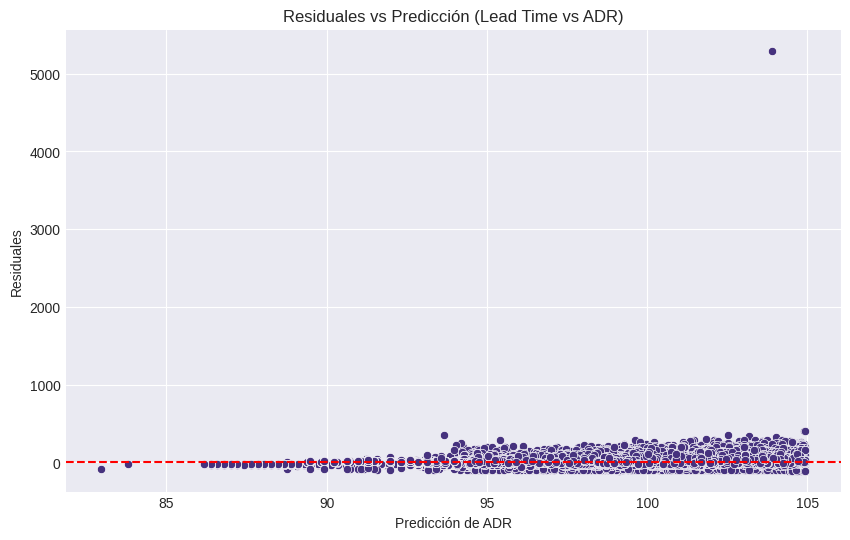

In [ ]:
# 3.2. Homocedasticidad: Residuales de Lead Time vs ADR
# Modelo de regresión lineal simple para obtener residuales
import statsmodels.api as sm
X = df['lead_time']
y = df['adr']
X = sm.add_constant(X)  # Agregar una constante para el intercepto
model = sm.OLS(y, X).fit()
residuals = model.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(X), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuales vs Predicción (Lead Time vs ADR)')
plt.xlabel('Predicción de ADR')
plt.ylabel('Residuales')
plt.show()


# Analisis de donde provienen nuestros clientes

In [ ]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [ ]:
b = folium.Map()
country_wise.dtypes

country         object
No of guests     int64
dtype: object

In [ ]:
gueats = px.choropleth(country_wise,
                      locations = country_wise['country'],
                      color = country_wise['No of guests'],
                      hover_name = country_wise['country'],
                       title = "Ciudad origen de los huespedes"
                      )
gueats.show()

In [ ]:
# Filtrar los registros no cancelados y contar por país
guest_country = data[data['is_canceled'] == 0] ['country'].value_counts().reset_index()
# Renombrar las columnas
guest_country.columns=['country', 'Number of guests']
guest_country

,country,Number of guests
0,PRT,1432
1,GBR,947
2,ESP,511
3,0,371
4,DEU,265
...,...,...
57,AGO,1
58,BLR,1
59,UKR,1
60,SMR,1


In [ ]:
# Calcular el número total de huéspedes
total_guests = guest_country['Number of guests'].sum()
#Calcula el porcentaje
guest_country['Guests in %'] = round (guest_country['Number of guests'] / total_guests * 100, 2)
guest_country

,country,Number of guests,Guests in %
0,PRT,1432,32.47
1,GBR,947,21.47
2,ESP,511,11.59
3,0,371,8.41
4,DEU,265,6.01
...,...,...,...
57,AGO,1,0.02
58,BLR,1,0.02
59,UKR,1,0.02
60,SMR,1,0.02


In [ ]:
import plotly.offline as pyo
import plotly.graph_objs as go
#Genera la grafica de barras con los puntos
trace = go.Bar(
    x=guest_country['country'],
    y=guest_country['Number of guests'],
    marker=dict(color='#CD7F32')
)
data1 =[trace]
layout = go.Layout(title = 'Invitados por pais')
fig=go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [ ]:
# Mostrar el DataFrame y el número total de huéspedes
print(guest_country)
print(f"Total number of guests: {total_guests}")

   country  Number of guests  Guests in %
0      PRT              1432        32.47
1      GBR               947        21.47
2      ESP               511        11.59
3        0               371         8.41
4      DEU               265         6.01
..     ...               ...          ...
57     AGO                 1         0.02
58     BLR                 1         0.02
59     UKR                 1         0.02
60     SMR                 1         0.02
61     ALB                 1         0.02

[62 rows x 3 columns]
Total number of guests: 4410


In [ ]:
total_guests = guest_country['Number of guests'].sum()
# Calcular el número total de huéspedes
total_guests = guest_country['Number of guests'].sum()
#guest_country['guests in %'] = round(guest_country['number_guests']/total_guests * 100,2)

# Analizando los precios por hotel

In [ ]:
resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 1)]

In [ ]:
resort.shape

(25982, 32)

In [ ]:
city.shape

(16035, 32)

In [ ]:
resort = resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort

,arrival_date_month,adr
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [ ]:
city = city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city

,arrival_date_month,adr
0,April,123.142873
1,August,130.069507
2,December,98.226915
3,February,92.106721
4,January,90.132058
5,July,120.821477
6,June,131.597007
7,March,105.079487
8,May,134.818654
9,November,94.592899


In [ ]:
precios=resort.merge(city,on='arrival_date_month')
precios.columns=['mes','precio_resort','precio_city']
precios

,mes,precio_resort,precio_city
0,April,76.841664,123.142873
1,August,182.103524,130.069507
2,December,64.072826,98.226915
3,February,53.624311,92.106721
4,January,48.599615,90.132058
5,July,150.914540,120.821477
6,June,109.026942,131.597007
7,March,57.110018,105.079487
8,May,77.725129,134.818654
9,November,48.956548,94.592899


In [ ]:
px.line(precios, x = 'mes', y=['precio_resort', 'precio_city'], title ='Precio de habitación por noche durante el mes' )